<a href="https://colab.research.google.com/github/thalespieirini/Colab-linear-algebra/blob/master/Aproxima%C3%A7%C3%A3o%20por%20Minimos%20Quadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório Mínimos Quadrados: 
## *Construção e resolução de sistemas lineares em problemas de mínimos quadrados*

In [0]:
#@title Bases de dados obtidas em  https://newonlinecourses.science.psu.edu/stat501 e http://archive.ics.uci.edu/ml/datasets/ 
from scipy import ndimage
import scipy as sp
import matplotlib.pyplot as plt
from google.colab import files
import pandas as bd
import numpy as np
from matplotlib import gridspec

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


## Exercício: 
![alt text](https://forum.americanexpedition.us/images/bluegill/bluegill-held-in-hands.jpg)

Em 1981, começou a análise de n = 78 bluegills (uma espécia de peixes) do Lake Mary em Minnesota (EUA). Os pesquisadores (Cook and Weisberg, 1999) mensuraram e registraram os seguintes dados (bluegills.txt):

* Idade do peixe (em anos) 
* Tamanho do peixe (em mm)

Os pesquisadores estavam interessados em associar em como o **tamanho do peixe está associado a sua idade**. Usando seus conhecimentos de cálculo numérico, pede-se que se realize um ajuste desses pontos para alguma curva que os represente bem. Realize um plot de sua resposta.



In [8]:
P = np.array([[1,3],
               [-3,1]])

Pi = np.linalg.inv(P)

D = np.array ([[1,0],[0,0]])

A = D@Pi
print (A)
A = P@A
print (A)

A=P@(D@Pi)
print (A)

[[ 0.1 -0.3]
 [ 0.   0. ]]
[[ 0.1 -0.3]
 [-0.3  0.9]]
[[ 0.1 -0.3]
 [-0.3  0.9]]


##Inicialmente vamos trabalhar com dados construidos e depois o desafio vai ser usar os dados reais desse problema 


Os dados construidos são:

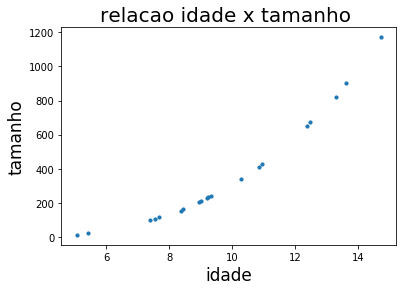

In [9]:
np.random.seed(0)
x = 2 + 3 * np.random.normal(2, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.title('relacao idade x tamanho ', fontsize=20)
plt.xlabel('idade', fontsize=17)
plt.ylabel('tamanho', fontsize=17)
plt.show()



Faça os mínimos quadrados usando uma aproximação quadrática e outra exponencial. Qual delas é mais interessantenesse caso?  

In [0]:
def aproExpo(x,y):
  yl = np.log(y)
  V = np.zeros((x.shape[0],2))
  V[:,0], V[:,1] = 1 , np.log(x) 
  A = V.T @ V 
  b = V.T @ yl
  c = np.linalg.solve(A,b)
  c[0] = np.exp(c[0])
  return c
  
def aproPoli(x,y):
  V = np.zeros((x.shape[0],3))
  V[:,0], V[:,1], V[:,2] = 1 , x, x**2
  A = V.T @ V 
  b = V.T @ y
  c = np.linalg.solve(A,b)
  return c

def aproLin(x,y):
  V = np.zeros((x.shape[0],2))
  V[:,0], V[:,1] = 1 , x
  A = V.T @ V 
  b = V.T @ y
  c = np.linalg.solve(A,b)
  c[0] = np.exp(c[0])
  return c

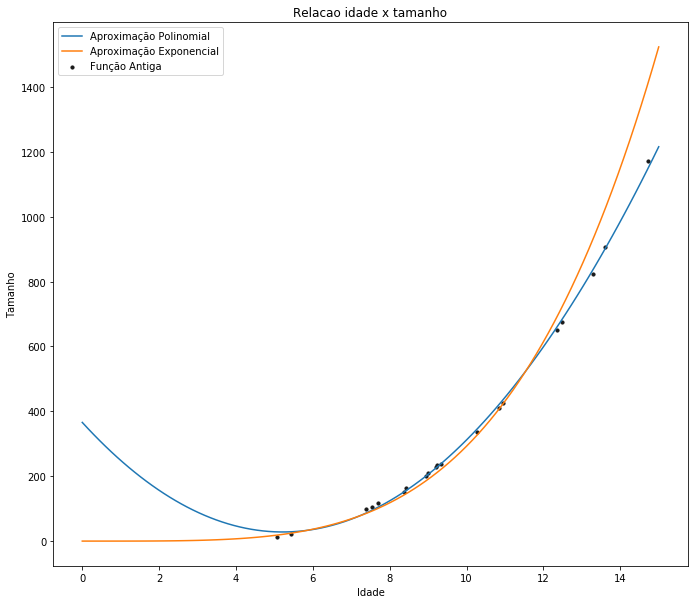

In [11]:
cp = aproPoli(x,y)
ce = aproExpo(x,y)

lin = np.linspace(0,15,100)

figure = plt.figure(figsize=[15,10],facecolor='w',edgecolor='black')
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) #Define a localização e proporção dos dois subplots
ax = figure.add_subplot(gs[0])

ax.plot (lin,1*cp[0]+lin[:]*cp[1]+(lin[:]**2)*cp[2], label = 'Aproximação Polinomial')
ax.plot (lin,ce[0]*lin**ce[1], label = 'Aproximação Exponencial')
ax.scatter(x,y, s=10, c=[[0.1,0.1,0.1,1]], label='Função Antiga')
ax.title.set_text('Relacao idade x tamanho')
ax.set_xlabel('Idade')
ax.set_ylabel('Tamanho')
ax.legend()


### Desafio:

Usar os dados reais dos peixes e decidir qual curva usar para aproximar!  Link de bluegills.csv: [Download](https://drive.google.com/open?id=1xUSMAwAUuEqx8lDp0fS_PllLoJ1zsO_o)




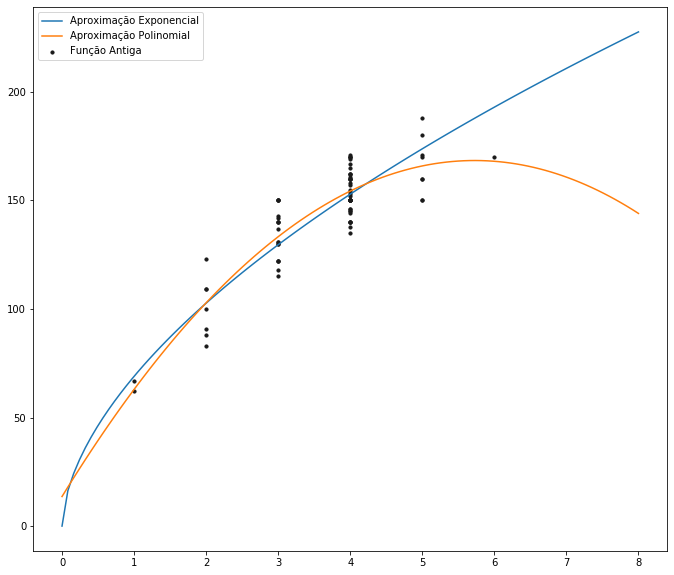

In [12]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1xUSMAwAUuEqx8lDp0fS_PllLoJ1zsO_o'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('bluegills_LakeMary_Minnesota.csv') 
B = (bd.read_csv('bluegills_LakeMary_Minnesota.csv',header=None)).to_numpy()

A = np.zeros(shape=(B.shape[0]-1,B.shape[1]))
for i in range (1,B.shape[0]):
  for j in range (0,B.shape[1]):
    A[i-1,j] = B[i,j]

x = A[:,0]
y = A[:,1]



cp = aproPoli(x,y)
ce = aproExpo(x,y)
cl = aproLin(x,y)

lin = np.linspace(0,8,100)

figure = plt.figure(figsize=[15,10],facecolor='w',edgecolor='black')
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) #Define a localização e proporção dos dois subplots
ax = figure.add_subplot(gs[0])

ax.plot (lin,ce[0]*lin**ce[1], label = 'Aproximação Exponencial')
#ax.plot (lin,cp[0]+lin[:]*cp[1], label = 'Aproximação Linear')
ax.plot (lin,cp[0]+lin[:]*cp[1]+(lin[:]**2)*cp[2], label = 'Aproximação Polinomial')

ax.scatter(x,y, s=10, c=[[0.1,0.1,0.1,1]], label='Função Antiga')
ax.legend()